## Preparing the tools


In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

#models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve



## Load data

In [6]:
df=pd.read_csv("heart_disease.csv")
df.shape # (rows,columns)    

(303, 14)

In [7]:
## Data Exploration (Exploratory data analysis or EDA)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

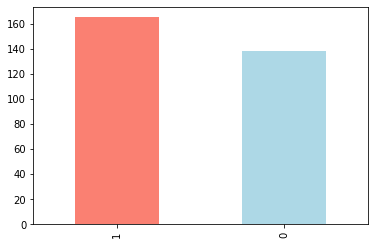

In [9]:
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
#checking missing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [15]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


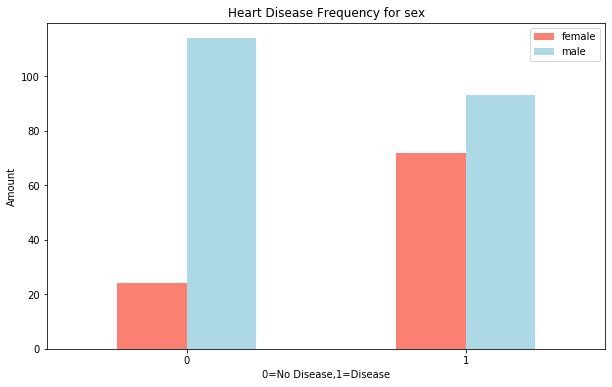

In [21]:
#create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0=No Disease,1=Disease")
plt.ylabel("Amount")
plt.legend(["female","male"])
plt.xticks(rotation=0);


## Age vs Heart Rate for heart disease

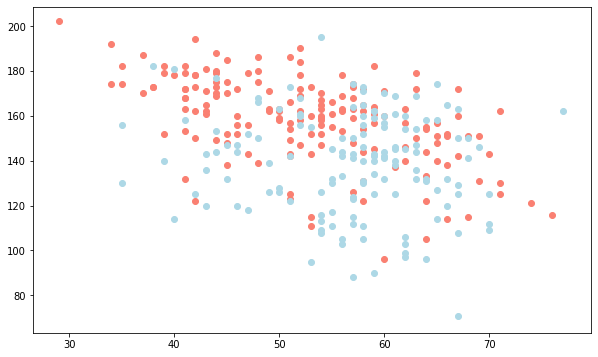

In [28]:
#Create another rfigure
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
           c="salmon")
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
           c="lightblue")

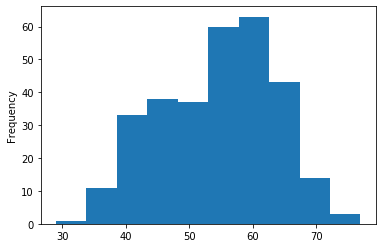

In [56]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

In [30]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


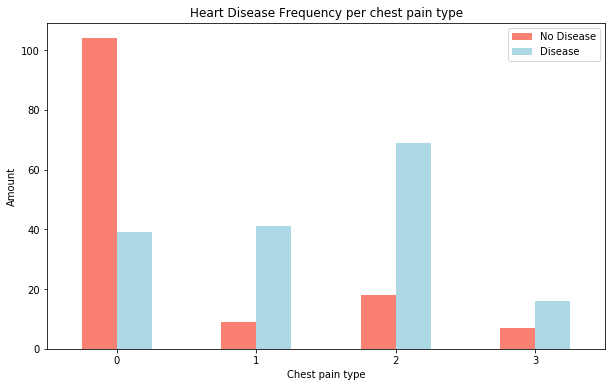

In [33]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["salmon","lightblue"]
                                 )

plt.title("Heart Disease Frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [34]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
#Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


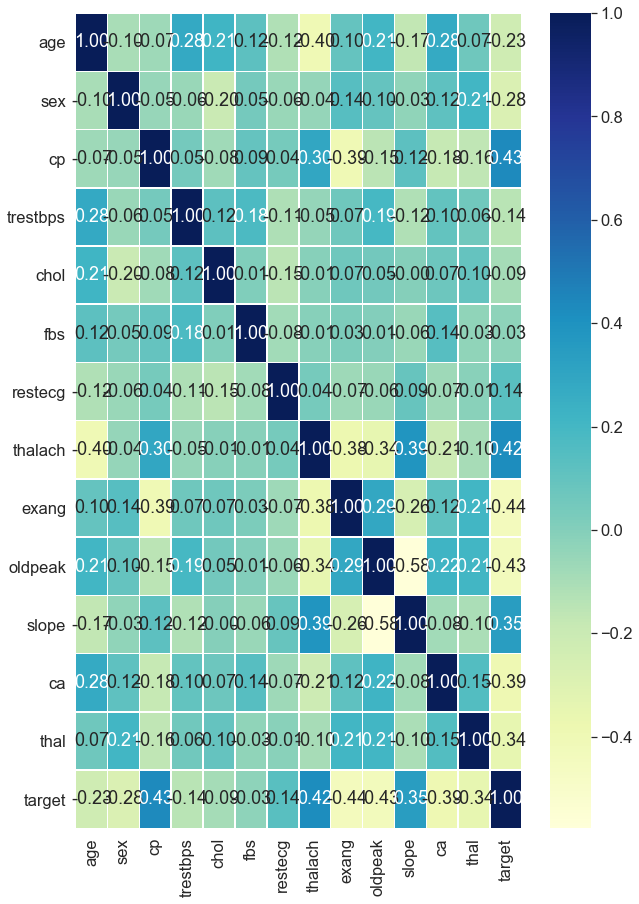

In [99]:
#Make correlation matrix prettier
corr_matrix=df.corr()
fig, ax=plt.subplots(figsize=(10,15))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu");


In [37]:
# Splitting the data into x and y traina and test sets
x=df.drop("target", axis=1)
y=df["target"]

In [38]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [39]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [40]:
np.random.seed(42)

#Splitting the data into train and test
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)



## We will try 3 different ML model
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. RandomForestClassifier

In [46]:
# Put models in a dictionary
models={"Logistic Regression": LogisticRegression(),
       "KNN": KNeighborsClassifier(),
       "Random Forest": RandomForestClassifier()}
# Create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    
    np.random.seed(42)
    
    #create an empty dictionary to keep model scores
    model_score={}
    # Loop through the models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(x_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_score[name]=model.score(x_test,y_test)
    return model_score    


In [47]:
model_score=fit_and_score(models=models,
                         x_train=x_train,
                         x_test=x_test,
                         y_train=y_train,
                         y_test=y_test)
model_score

C:\Users\KIIT\Desktop\sample_project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [43]:
fit_and_score

<function __main__.fit_and_score(models, x_train, x_test, y_train, y_test)>

## Model comparison


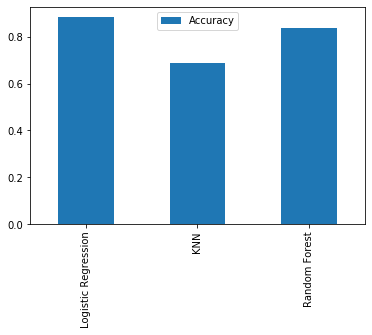

In [59]:
model_compare=pd.DataFrame(model_score,index=["Accuracy"])
model_compare.T.plot.bar();

In [60]:
model_compare

,Logistic Regression,KNN,Random Forest
Accuracy,0.885246,0.688525,0.836066


AttributeError: 'dict' object has no attribute 'plot'

## 
1. Hyperparameter tuning
2. Feature importance
3. Confusion matrix
4. Cross-validation
5. Precision
6. Recall
7. F1 Score
8. Classification Report
9. ROC curve
10. AUC

### Hyperparameter Tuning

In [61]:
# Lets tune KNN
train_scores=[]
test_scores=[]

# Create a list of different values of n_neighbors
neighbors=range(1,21)

# Setup KNN instance
knn=KNeighborsClassifier()
# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train,y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(x_train,y_train))
    
    #Update the test scores
    test_scores.append(knn.score(x_test,y_test))
    

In [63]:
train_scores


[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [65]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

maximum knn score on the test data: 75.41%


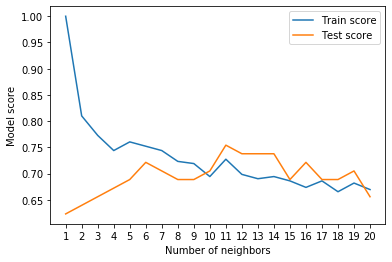

In [68]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"maximum knn score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter tuning using RandomizedSearchCV

In [84]:
log_reg_grid={"C": np.logspace(-4,4,20),
             "solver":["liblinear"]}
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

In [77]:
# Tuning logisticRegression
np.random.seed(42)

# setup random hyperparameter search for LogisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

#Fitting the model
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [79]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [80]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

### Now tuning RandomForestClassifier

In [85]:
np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)

rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [86]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [87]:
rs_rf.score(x_test,y_test)

0.8688524590163934

## Hyperparameter tuning using GridSearchCV

In [88]:
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}

gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)

gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [89]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [90]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

## Evaluating our tune machine learning classifier beyond accuracy
1. ROC curve and AUC score
2. Confusion Matrix
3. Classification report
4. Precision
5. Recall
6. F1-score

In [91]:
# Make predictions with tuned model
y_preds=gs_log_reg.predict(x_test)

In [92]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

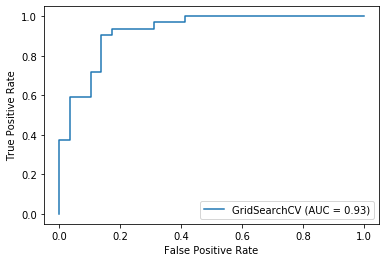

In [93]:
# plot ROc curve and calculate AUC metric
plot_roc_curve(gs_log_reg,x_test,y_test)

In [94]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


In [95]:
sns


<module 'seaborn' from 'C:\\Users\\KIIT\\Desktop\\sample_project1\\env\\lib\\site-packages\\seaborn\\__init__.py'>

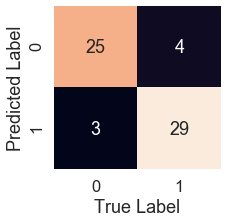

In [98]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    
    """
    Plots a nice looking confusion matrix using seaborn's heatmap
    
    """
    
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
plot_conf_mat(y_test,y_preds) 

 #### lets get a classification report as well as cross validated precision ,recall, anf f1-scorem

In [101]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### calculate evaluation metrics using cross-validation

In [105]:
 gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [107]:
# Create a new Classifier with the best parameters
clf=LogisticRegression(C= 0.20433597178569418,
                      solver="liblinear")


In [113]:
#Cross validated Accuracy
cv_accuracy=cross_val_score(clf,
                           x,
                           y,
                           cv=5,
                           scoring="accuracy")
cv_accuracy=np.mean(cv_accuracy)
cv_accuracy

0.8446994535519124

In [114]:
#Cross validated Precision
cv_precision=cross_val_score(clf,
                           x,
                           y,
                           cv=5,
                           scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [115]:
#Cross validated Recall
cv_recall=cross_val_score(clf,
                           x,
                           y,
                           cv=5,
                           scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [116]:
#Cross validated Accuracy
cv_f1_score=cross_val_score(clf,
                           x,
                           y,
                           cv=5,
                           scoring="f1")
cv_f1_score=np.mean(cv_f1_score)
cv_f1_score

0.8673007976269721

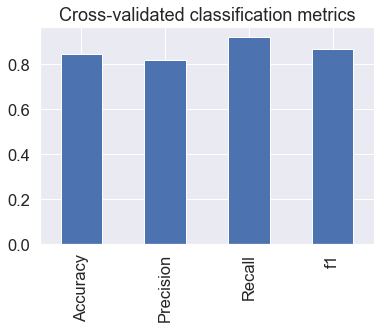

In [118]:
# Visualize our cross-validated metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_accuracy,
                        "Precision":cv_precision,
                        "Recall":cv_recall,
                        "f1":cv_f1_score},
                       index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False)


### Find features of our LogisticRegression model

In [119]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [121]:
# Find an instance of LogisticRegression
clf=LogisticRegression(C=0.20433597178569418,
                      solver="liblinear")
clf.fit(x_train,y_train);

In [122]:
# Check coef
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [124]:
# Match coef's of features to columns
feature_dict=dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

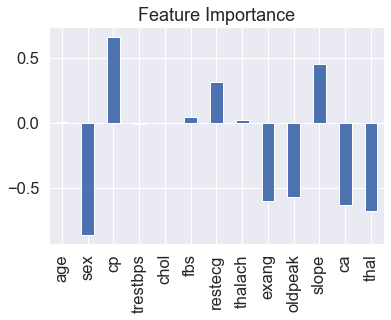

In [125]:
# visualize feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

In [128]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93
